In [1]:
from eda_import import *

In [2]:
df_kleat = pd.read_csv('./UHR/C1/tasrkleat-results/kleat/styleA-filtered-benchmark.txt',
                      header=None, names=['filename', 'sensitivity', 'precision', 'f1'], sep=' ')
df_kleat['program'] = 'KLEAT'
df_kleat['filter_style'] = 'A'

In [3]:
df_kleat_tbr = pd.read_csv('./UHR/C1/tasrkleat-results/kleat/styleB-filtered-benchmark.txt',
                          header=None, names=['filename', 'sensitivity', 'precision', 'f1'], sep=' ')
df_kleat_tbr['program'] = 'KLEAT'
df_kleat_tbr['filter_style'] = 'B'

In [4]:
df_kleat_tbr.head(2)

,filename,sensitivity,precision,f1,program,filter_style
0,./UHR/C1/tasrkleat-results/kleat/postproc-styleB-tbr-tuning/tbr_gt_1.csv,0.113086,0.546875,0.187416,KLEAT,B
1,./UHR/C1/tasrkleat-results/kleat/postproc-styleB-tbr-tuning/tbr_gt_2.csv,0.090468,0.691358,0.160000,KLEAT,B


In [5]:
df_cm2 = pd.read_csv(
    './ContextMap2/ContextMap_v2.7.9_static/cm2-output-parameter-sweep/UHR/C1/vs-polyA-Seq.concat.csv',
     header=None, names=['filename', 'sensitivity', 'precision', 'f1'], sep=' ')
df_cm2['program'] = 'ContextMap 2'

In [6]:
df_cm2.head(2)

,filename,sensitivity,precision,f1,program
0,../ContextMap2/ContextMap_v2.7.9_static/cm2-output-parameter-sweep/UHR/C1/04/02/polyA_tails.bed,0.074313,0.807018,0.136095,ContextMap 2
1,../ContextMap2/ContextMap_v2.7.9_static/cm2-output-parameter-sweep/UHR/C1/04/03/polyA_tails.bed,0.053312,0.785714,0.099849,ContextMap 2


In [7]:
df = pd.concat([df_kleat, df_kleat_tbr, df_cm2])

In [8]:
df.head()

,f1,filename,filter_style,precision,program,sensitivity
0,0.258696,./UHR/C1/tasrkleat-results/kleat/postproc-styleA-polyA-confidence/nda15-ltc0-nbr0-maxbrtl0-hxm16.csv,A,0.395349,KLEAT,0.192246
1,0.248432,./UHR/C1/tasrkleat-results/kleat/postproc-styleA-polyA-confidence/nda15-ltc0-nbr0-maxbrtl0-hxm2.csv,A,0.556180,KLEAT,0.159935
2,0.258696,./UHR/C1/tasrkleat-results/kleat/postproc-styleA-polyA-confidence/nda15-ltc0-nbr0-maxbrtl2-hxm16.csv,A,0.395349,KLEAT,0.192246
3,0.248432,./UHR/C1/tasrkleat-results/kleat/postproc-styleA-polyA-confidence/nda15-ltc0-nbr0-maxbrtl2-hxm2.csv,A,0.556180,KLEAT,0.159935
4,0.258696,./UHR/C1/tasrkleat-results/kleat/postproc-styleA-polyA-confidence/nda15-ltc0-nbr0-maxbrtl4-hxm16.csv,A,0.395349,KLEAT,0.192246


In [9]:
df.program.value_counts()

KLEAT           1161
ContextMap 2    28  
Name: program, dtype: int64

In [10]:
df.shape

(1189, 6)

In [11]:
def assign_color(row):
    v = row.program
    if v == 'KLEAT':
        if row.filter_style == 'A':
            return 'red'
        elif row.filter_style == 'B':
            return 'orange'
        else:
            raise
    elif v == 'ContextMap 2':
        return 'blue'
    elif v == 'DaPars':
        return 'magenta'
    else:
        raise
    
df['color'] = df.apply(assign_color, axis=1)

In [12]:
# Adding datapoints from DaPars
# df_dapars = pd.read_csv('dapars/', sep='\t')

,f1,filename,filter_style,precision,program,sensitivity,color
205,0.241895,./UHR/C1/tasrkleat-results/kleat/postproc-styleA-polyA-confidence/nda25-ltc4-nbr2-maxbrtl4-hxm2.csv,A,0.530055,KLEAT,0.156704,red


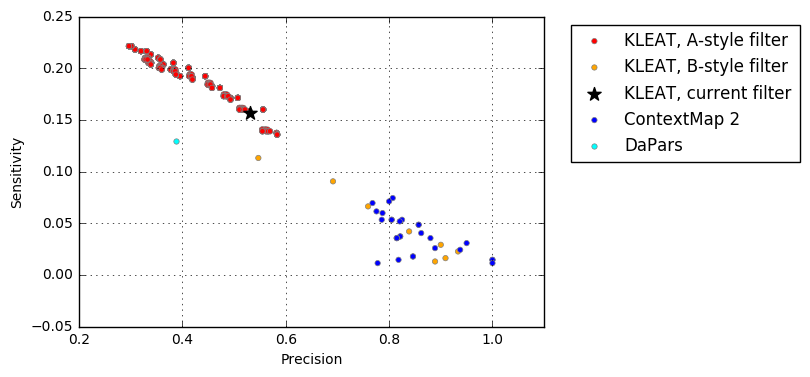

In [15]:
ax = plt.axes()

colors = 'rgb'

# mask for manuscript filter
mask = df.filename.str.contains('nda25-ltc4-nbr2-maxbrtl4-hxm2.csv')
for color in ['red', 'orange']:
    _df = df[-mask].query('color == "{0}"'.format(color))
    color2label_dd = {
        'red': 'KLEAT, A-style filter',
        'orange': 'KLEAT, B-style filter ',
        'blue': 'ContextMap2',
    }
    label = color2label_dd[color]
    ax.scatter(_df.precision, _df.sensitivity, 
               color=_df.color.values,
               s=15,
               edgecolor='grey',
               linewidth=0.5,
               label=label)

display(df[mask])
df[mask].plot.scatter(ax=ax,
    x='precision', y='sensitivity', color='black', marker='*', s=100, label='KLEAT, current filter')
   
# for proper ordering
for color in ['blue']:
    _df = df[-mask].query('color == "{0}"'.format(color))
    color2label_dd = {
        'red': 'KLEAT, A-style filter',
        'orange': 'KLEAT, B-style filter ',
        'blue': 'ContextMap 2',
    }
    label = color2label_dd[color]
    ax.scatter(_df.precision, _df.sensitivity, 
               color=_df.color.values,
               s=15,
               edgecolor='grey',
               linewidth=0.5,
               label=label)
    
    
# dapars UHRC1 vs HBRC4
ax.scatter([0.3883495145631068], [0.12924071082390953], color='cyan',
               s=15,
               edgecolor='grey', linewidth=0.5, label='DaPars')

    
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", scatterpoints=1)
ax.set_xlabel('Precision')
ax.set_ylabel('Sensitivity')
ax.grid()
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])